In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm

from IPython.core.pylabtools import figsize

figsize(10, 6)  

df = pd.read_csv("train.csv", na_values="?", dtype={"ID": str}).dropna().reset_index()

df.head()


,index,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


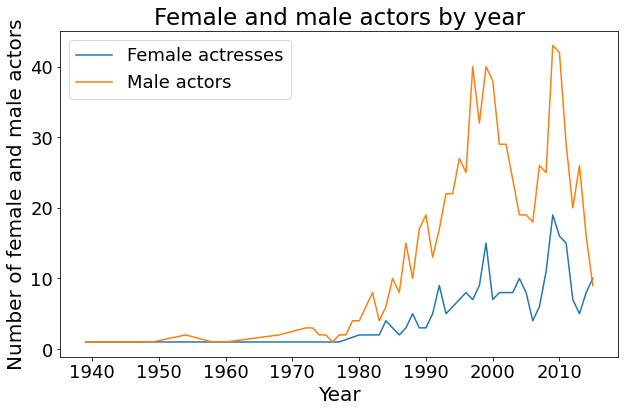

In [185]:
df_female = df[df['Lead'] == 'Female']
df_female_count = df_female.groupby('Year')['Number of female actors'].count()
df_male = df[df['Lead'] == "Male"]
df_male_count = df_male.groupby('Year')['Number of male actors'].count()

plt.plot(df_female_count.index, df_female_count.values, label = "Female actresses")
plt.plot(df_male_count.index, df_male_count.values, label = "Male actors")
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of female and male actors', fontsize=20)
plt.legend(fontsize=18)
plt.title('Female and male actors by year', fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

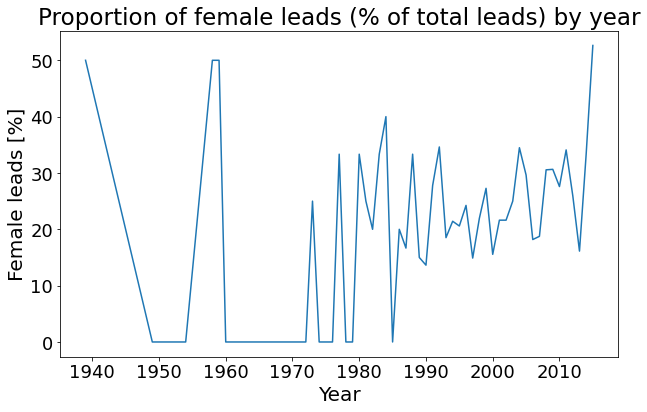

In [186]:
df_female = df[df['Lead'] == 'Female']
df_female_count = df_female.groupby('Year')['Lead'].count()

df_male = df[df['Lead'] == 'Male']
df_male_count = df_male.groupby('Year')['Lead'].count()
df_counts = pd.concat([df_female_count, df_male_count], axis=1).fillna(0)
df_counts.columns = ['Female Leads', 'Male Leads']

df_counts = df_counts.sort_index()

# print(df_counts)

df_counts['Percent female'] = df_counts['Female Leads'] / (df_counts['Male Leads'] + df_counts['Female Leads']) * 100

plt.plot(df_counts.index, df_counts['Percent female'], label='Percent Female Leads')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Female leads [%]', fontsize=20)
plt.title('Proportion of female leads (% of total leads) by year', fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

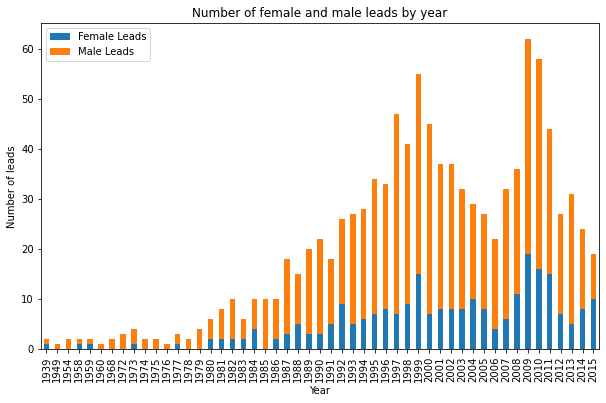

In [187]:
df_female = df[df['Lead'] == 'Female']
df_female_count = df_female.groupby('Year')['Lead'].count()

df_male = df[df['Lead'] == 'Male']
df_male_count = df_male.groupby('Year')['Lead'].count()
df_counts = pd.concat([df_female_count, df_male_count], axis=1).fillna(0)
df_counts.columns = ['Female Leads', 'Male Leads']
df_counts = df_counts.sort_index()

df_counts.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of leads')
plt.title('Number of female and male leads by year')
plt.show()


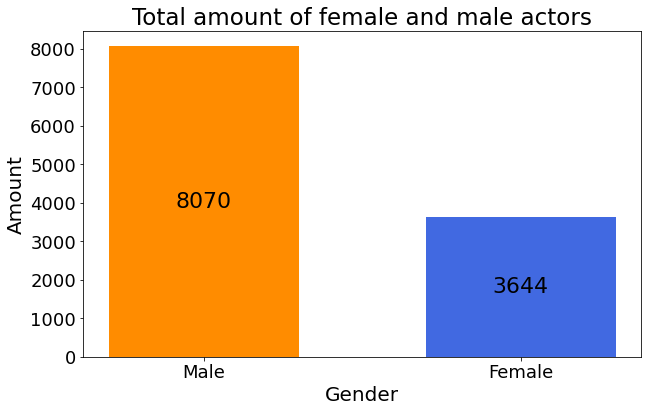

In [188]:
df_female_sum = df['Number of female actors'].sum()
df_male_sum = df['Number of male actors'].sum()

fig, ax = plt.subplots()
actors = ['Male', 'Female']
bar_colours = ['darkorange', 'royalblue']
bar_width = 0.6

bars = ax.bar(actors, [df_male_sum, df_female_sum], color=bar_colours, width=bar_width)
ax.set_ylabel('Amount', fontsize=20) 
ax.set_xlabel('Gender', fontsize=20)  
ax.set_title('Total amount of female and male actors', fontsize=23) 

# Add total count inside each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, height, fontsize=22, ha='center', va='center', color='black')

# Change the size of the x-axis and y-axis
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()


In [189]:
# femaleI = (df['Lead'] == "Female" )
# # female_index = df['Lead'].index.isin(femaleI)
# # print(female_index)
# # print(femaleI
# gender_percents = df.groupby('Year')[['Number words female', 'Number words male', 'Total words']].sum()

# ##  print(gender_percents)
# gender_percents['Percent female'] = gender_percents['Number words female'] / (gender_percents['Total words']) * 100
# gender_percents.loc[df['Lead'] == 'Female', 'Percent female'] += (df['Number words female'] + df['Number of words lead'])/ df['Total words'] * 100
  
# g# ender_percents['Percent female'].plot()
# plt.xlabel('Year')
# plt.ylabel('Number of words female [%]')
# plt.title('Number of words female (% of total words) by year')
# plt.show()


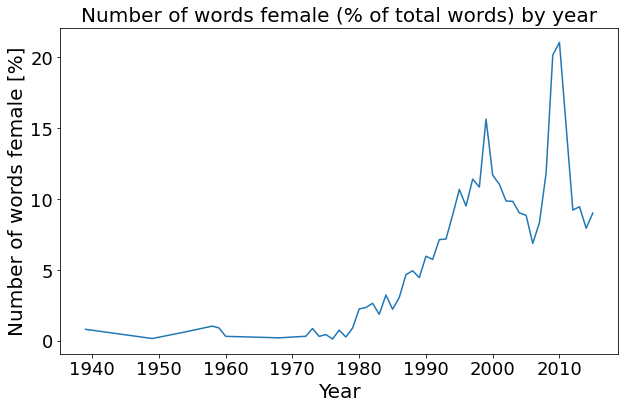

In [190]:
df['Norm_words_female'] = df.apply(lambda row: (row['Number words female'] + row['Number of words lead']) / row['Total words'] if row['Lead'] == "Female" else row['Number words female'] / row['Total words'], axis=1)
test = df.groupby('Year')[['Norm_words_female']].sum()
# print(test)
test.plot(legend=None)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of words female [%]',fontsize=20)
plt.title('Number of words female (% of total words) by year', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

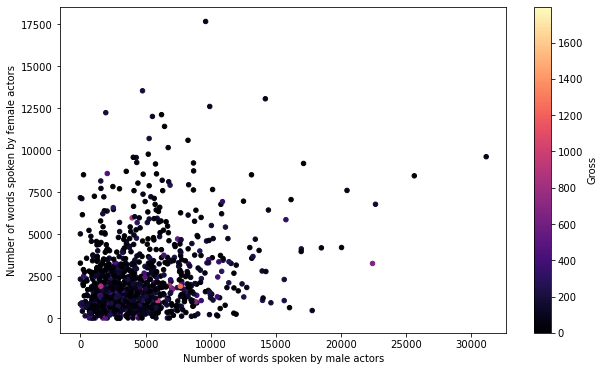

In [191]:
cmap = plt.cm.get_cmap('viridis_r')

# Pass the reversed colormap to the colormap parameter
df.plot.scatter(x='Number words male', y='Number words female', c='Gross', cmap='magma', sharex=False)
plt.xlabel('Number of words spoken by male actors')
plt.ylabel('Number of words spoken by female actors')

plt.show()


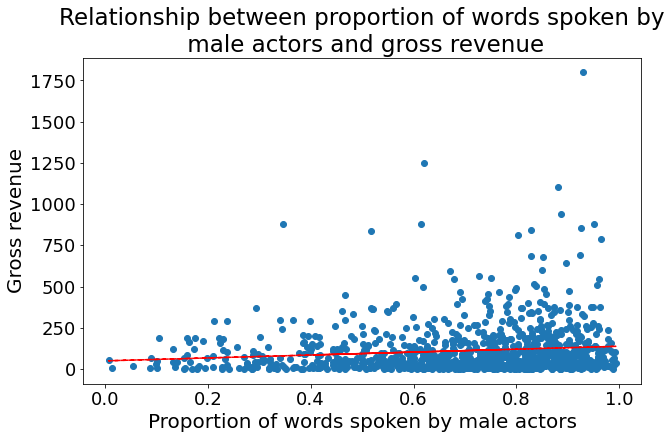

In [192]:
import pandas as pd
import numpy as np

# load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

# calculate the proportion of words spoken by male actors
df['prop_words_male'] = df.apply(lambda row: (row['Number words male'] + row['Number of words lead']) / row['Total words'] if row['Lead'] == "Male" else row['Number words male'] / row['Total words'], axis=1)

plt.scatter(df['prop_words_male'], df['Gross'])

# fit and plot a linear regression line
z = np.polyfit(df['prop_words_male'], df['Gross'], 1)
p = np.poly1d(z)
plt.plot(df['prop_words_male'], p(df['prop_words_male']), "r--")

# add axis labels and title
plt.xlabel('Proportion of words spoken by male actors', fontsize=20)
plt.ylabel('Gross revenue', fontsize=20)
plt.title('Relationship between proportion of words spoken by\n male actors and gross revenue', fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


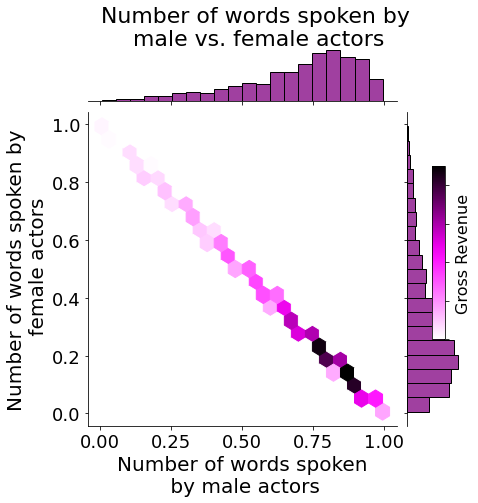

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

df['Norm_words_male'] = df.apply(lambda row: (row['Number words male'] + row['Number of words lead']) / row['Total words'] if row['Lead'] == "Male" else row['Number words male'] / row['Total words'], axis=1)
df['Norm_words_female'] = df.apply(lambda row: (row['Number words female'] + row['Number of words lead']) / row['Total words'] if row['Lead'] == "Female" else row['Number words female'] / row['Total words'], axis=1)

g = sns.jointplot(data=df, x='Norm_words_male', y='Norm_words_female', kind='hex', color='purple')
g.fig.suptitle("Number of words spoken by\n male vs. female actors", y=1.07, fontsize=22)
g.set_axis_labels("Number of words spoken\n by male actors", "Number of words spoken by\n female actors", fontsize=20)

# Change the size of x and y axis ticks
g.ax_joint.tick_params(axis='x', labelsize=18)
g.ax_joint.tick_params(axis='y', labelsize=18)

# Add color bar
cbar_ax = g.fig.add_axes([.91, .3, .03, .4])
g.fig.colorbar(mappable=g.ax_joint.collections[0], cax=cbar_ax)
cbar_ax.set_yticklabels([])
plt.ylabel('Gross Revenue', fontsize=16)
plt.show()


Text(0, 0.5, 'Number of words spoken by female actors')

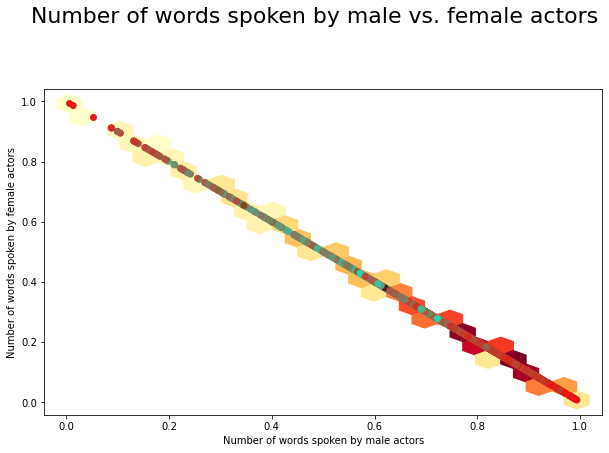

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("train.csv")

# Calculate the normalized number of words spoken by male and female actors
df['Norm_words_male'] = df.apply(lambda row: (row['Number words male'] + row['Number of words lead']) / row['Total words'] if row['Lead'] == "Male" else row['Number words male'] / row['Total words'], axis=1)
df['Norm_words_female'] = df.apply(lambda row: (row['Number words female'] + row['Number of words lead']) / row['Total words'] if row['Lead'] == "Female" else row['Number words female'] / row['Total words'], axis=1)

# Calculate the proportion of female actors in each movie
df['Proportion_female'] = df['Number of female actors'] / (df['Number of male actors'] + df['Number of female actors'])

# Create the hexagonal bins using the hexbin function from matplotlib
bins = plt.hexbin(df['Norm_words_male'], df['Norm_words_female'], gridsize=20, mincnt=1, cmap='YlOrRd')

# Get the colors corresponding to each point based on its Gross value
colors = []
for i in range(len(df)):
    if df.loc[i, 'Lead'] == 'Male':
        prop_male = 1 - df.loc[i, 'Proportion_female']
        prop_female = df.loc[i, 'Proportion_female']
    else:
        prop_male = df.loc[i, 'Proportion_female']
        prop_female = 1 - df.loc[i, 'Proportion_female']
    color = plt.cm.YlOrRd(df.loc[i, 'Gross'] / df['Gross'].max())
    color = (color[0]*prop_male, color[1]*prop_female, color[2]*prop_female) # adjust color based on proportion of male and female actors
    colors.append(color)

# Plot the scatter points on top of the hexagonal bins
plt.scatter(df['Norm_words_male'], df['Norm_words_female'], c=colors)

# Set the title and axis labels
plt.suptitle("Number of words spoken by male vs. female actors", y=1.07, fontsize=22)
plt.xlabel("Number of words spoken by male actors")
plt.ylabel("Number of words spoken by female actors")

# Add a colorbar
# cb = plt.colorbar(bins)
# cb.set_label('Gross')
